<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression 
* customer analysis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta 
import plotnine as gg 
from plotnine import ggplot, aes
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# Regression

In [8]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 384 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=5c9f5ba8dc4badae37a754c214e0563d2e2113d5ca19f7bb06e7609b2655608d
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [9]:
from pydataset import data

In [10]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [11]:
list_data = data()
list_data

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [17]:
raw = dict(zip(list_data['dataset_id'].values, [data(a) for a in list_data['dataset_id']]))

/usr/local/lib/python3.7/dist-packages/pydataset/__init__.py:34: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  df = __read_csv(item)


In [20]:
raw.keys()

dict_keys(['AirPassengers', 'BJsales', 'BOD', 'Formaldehyde', 'HairEyeColor', 'InsectSprays', 'JohnsonJohnson', 'LakeHuron', 'LifeCycleSavings', 'Nile', 'OrchardSprays', 'PlantGrowth', 'Puromycin', 'Titanic', 'ToothGrowth', 'UCBAdmissions', 'UKDriverDeaths', 'UKgas', 'USAccDeaths', 'USArrests', 'USJudgeRatings', 'USPersonalExpenditure', 'VADeaths', 'WWWusage', 'WorldPhones', 'airmiles', 'airquality', 'anscombe', 'attenu', 'attitude', 'austres', 'cars', 'chickwts', 'co2', 'crimtab', 'discoveries', 'esoph', 'euro', 'faithful', 'freeny', 'infert', 'iris', 'islands', 'lh', 'longley', 'lynx', 'morley', 'mtcars', 'nhtemp', 'nottem', 'npk', 'occupationalStatus', 'precip', 'presidents', 'pressure', 'quakes', 'randu', 'rivers', 'rock', 'sleep', 'stackloss', 'sunspot.month', 'sunspot.year', 'sunspots', 'swiss', 'treering', 'trees', 'uspop', 'volcano', 'warpbreaks', 'women', 'acme', 'aids', 'aircondit', 'aircondit7', 'amis', 'aml', 'bigcity', 'brambles', 'breslow', 'calcium', 'cane', 'capability'

In [27]:
import statsmodels.api as sm

In [40]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
x = raw[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = raw['price']

In [43]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
x_1 = x[['bedrooms', 'bathrooms', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated']]
x_2 = x[['sqft_living', 'sqft_lot','sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [60]:
x_1.bathrooms = x_1.bathrooms.astype(int)
x_1.floors = x_1.floors.astype(int)
x_1.yr_renovated = np.where(x_1.yr_renovated == 0, 'x', 'o')
x_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated
0,3,1,1,0,0,3,7,x
1,3,2,2,0,0,3,7,o
2,2,1,1,0,0,3,6,x
3,4,3,1,0,0,5,7,x
4,3,2,1,0,0,3,8,x


In [61]:
x_1 = pd.get_dummies(x_1, columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_renovated'])

In [62]:
x_1.head()

,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_renovated_o,yr_renovated_x
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [63]:
x_2.yr_built = 2022 - x_2.yr_built

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [64]:
scaler = StandardScaler()
x_2_std = scaler.fit_transform(x_2)
x_2 = pd.DataFrame(x_2_std, columns = x_2.columns)
x_2.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,-0.979835,-0.228321,-0.734708,-0.658681,0.544898,-0.352572,-0.306079,-0.943355,-0.260715
1,0.533634,-0.189885,0.460841,0.245141,0.681079,1.161568,-0.746341,-0.432686,-0.187868
2,-1.426254,-0.123298,-1.229834,-0.658681,1.293892,1.283537,-0.135655,1.070140,-0.172375
3,-0.130550,-0.244014,-0.891699,1.397515,0.204446,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.435422,-0.169653,-0.130895,-0.658681,-0.544548,0.409550,1.199335,-0.272190,-0.192849


In [67]:
x_ = pd.concat([x_1, x_2], axis = 1)
x_.head()

,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,yr_renovated_x,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,0,0,0,1,0,0,0,0,0,0,...,1,-0.979835,-0.228321,-0.734708,-0.658681,0.544898,-0.352572,-0.306079,-0.943355,-0.260715
1,0,0,0,1,0,0,0,0,0,0,...,0,0.533634,-0.189885,0.460841,0.245141,0.681079,1.161568,-0.746341,-0.432686,-0.187868
2,0,0,1,0,0,0,0,0,0,0,...,1,-1.426254,-0.123298,-1.229834,-0.658681,1.293892,1.283537,-0.135655,1.070140,-0.172375
3,0,0,0,0,1,0,0,0,0,0,...,1,-0.130550,-0.244014,-0.891699,1.397515,0.204446,-0.283288,-1.271816,-0.914174,-0.284522
4,0,0,0,1,0,0,0,0,0,0,...,1,-0.435422,-0.169653,-0.130895,-0.658681,-0.544548,0.409550,1.199335,-0.272190,-0.192849


In [68]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [69]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [70]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [71]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(6.77180821539791e+31, 21354147281.531746)

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

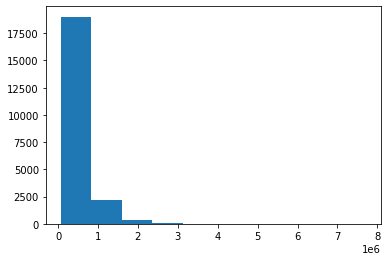

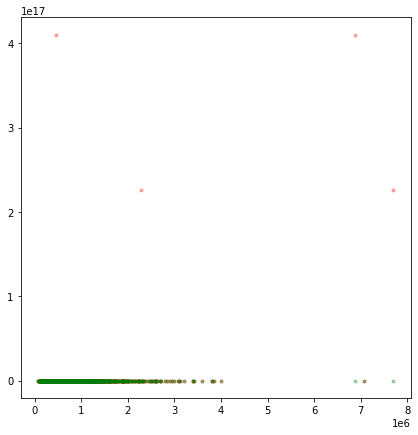

In [72]:
plt.figure(figsize = [7,7])
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)